In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<h4> We are uisng the following versions of the libraries:</h4>

- numpy == 1.18.5 

- pandas == 1.1.3

- tensorflow ==1.7.0

- keras == 2.4.3

- nltk ==3.5

- seaborn ==0.11.0

In [3]:
data = pd.read_csv("sentiment data.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

#### Five top records of data

In [5]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


#### Five last records of data

In [7]:
data.tail()

,label,time,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


#### Coloumns/features in data

In [9]:
data.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

#### Length of data

In [11]:
print('lenght of data is', len(data))

lenght of data is 1599999


#### Shape of data

In [13]:
data.shape

(1599999, 6)

#### Data information

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


#### Data types of all coloumns

In [17]:
data.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

#### Checking Null values

In [19]:
np.sum(data.isnull().any(axis=1))

0

#### Rows and columns in the dataset

In [21]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   6


In [22]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   1599999


#### Selecting the text and label coloumn

In [24]:
data=data[['text','label']]

In [135]:
data[data['label']==0]

,text,label
0,"[upset, cant, update, facebok, texting, it, mi...",0
1,"[kenichan, dived, many, times, bal, managed, s...",0
2,"[whole, body, fels, itchy, like, fire]",0
3,"[nationwideclas, no, behaving, al, im, mad, he...",0
4,"[kwesidei, whole, crew]",0
...,...,...
19995,"[one, day, holidays]",0
19996,"[feling, right, hate, damn, humprey]",0
19997,"[gezi, hv, read, whole, bok, personality, type...",0
19998,"[threw, sign, donie, bent, get, thinge, made, ...",0


#### Assigning 1 to Positive sentment 4

In [26]:
data['label'][data['label']==4]=1

#### Separating positive and negative tweets

In [28]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

#### taking one fourth data so we can run on our machine easily 

In [30]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

#### Combining positive and negative tweets

In [32]:
data = pd.concat([data_pos, data_neg])

#### Making statement text in lower case

In [34]:
data['text']=data['text'].str.lower()

In [35]:
data['text'].tail()

19995                            one more day of holidays 
19996    feeling so down right now .. i hate you damn h...
19997    geez,i hv to read the whole book of personalit...
19998    i threw my sign at donnie and he bent over to ...
19999    @heather2711 good thing i didn't find any then...
Name: text, dtype: object

#### Cleaning and removing Stop words of english

In [37]:
stopwords_list = stopwords.words('english')

In [38]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

#### Cleaning and removing the above stop words list from the tweet text

In [40]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

#### Cleaning and removing punctuations 

In [42]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [43]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

19995                                     one day holidays
19996                     feeling right  hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999    heather2711 good thing find none ones like com...
Name: text, dtype: object

#### Cleaning and removing repeating characters

In [45]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [46]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

#### Cleaning and removing email

In [48]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [49]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

#### Cleaning and removing URL's

In [51]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [52]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

#### Cleaning and removing Numeric numbers

In [54]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [55]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather god thing find none ones like come siz...
Name: text, dtype: object

#### Getting tokenization of tweet text

In [57]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [58]:
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

#### Applying Stemming

In [60]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))

In [61]:
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

#### Applying Lemmatizer

In [63]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

In [64]:
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

####  Separating input feature and label

In [66]:
X=data.text
y=data.label

In [67]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [68]:
sequences_matrix.shape

(40000, 500)

#### Separating the 70% data for training data and 30% for testing data

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [71]:
def tensorflow_based_model(): 
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(2000,50,input_length=max_len)(inputs) 
    layer = LSTM(64)(layer) 
    layer = Dense(256,name='FC1')(layer) 
    layer = Activation('relu')(layer) 
    layer = Dropout(0.5)(layer) 
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('sigmoid')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model 

# Model compilation

In [73]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

In [74]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 84s 258ms/step - accuracy: 0.5633 - loss: 0.6699 - val_accuracy: 0.7343 - val_loss: 0.5335
Epoch 2/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 83s 264ms/step - accuracy: 0.7501 - loss: 0.5156 - val_accuracy: 0.7354 - val_loss: 0.5260
Epoch 3/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 77s 244ms/step - accuracy: 0.7578 - loss: 0.5001 - val_accuracy: 0.7461 - val_loss: 0.5153
Epoch 4/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 82s 262ms/step - accuracy: 0.7641 - loss: 0.4985 - val_accuracy: 0.7446 - val_loss: 0.5232
Epoch 5/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 88s 280ms/step - accuracy: 0.7538 - loss: 0.5153 - val_accuracy: 0.7429 - val_loss: 0.5188
Epoch 6/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 92s 292ms/step - accuracy: 0.7777 - loss: 0.4725 - val_accuracy: 0.7450 - val_loss: 0.5216
Training finished !!


In [75]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.7376 - loss: 0.5232


In [76]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1]))

Test set
  Accuracy: 0.74


In [77]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step




confusion matrix


[[4593 1416]
 [1661 4330]]




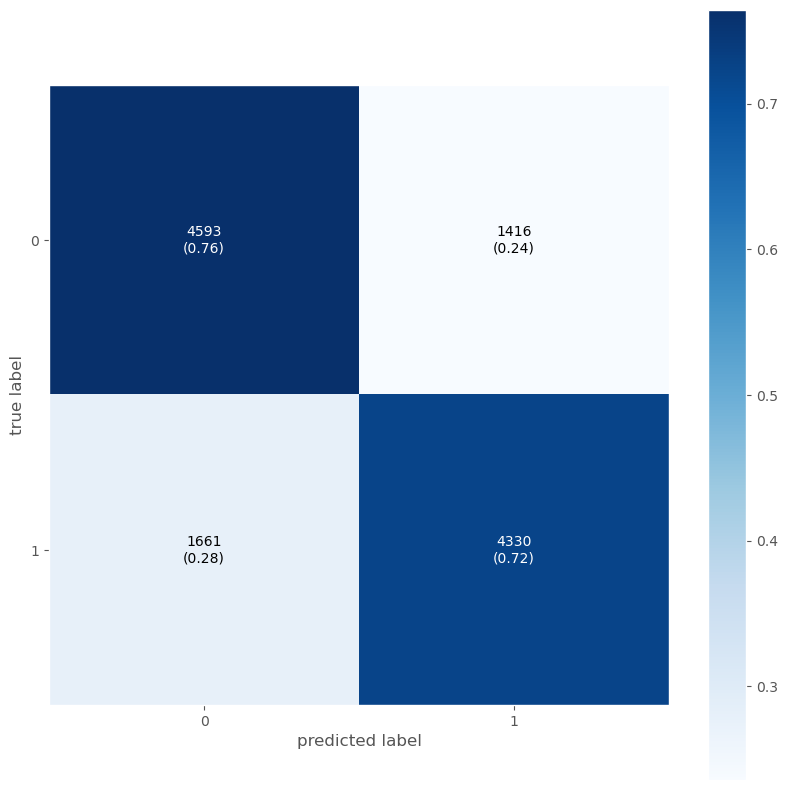

In [78]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

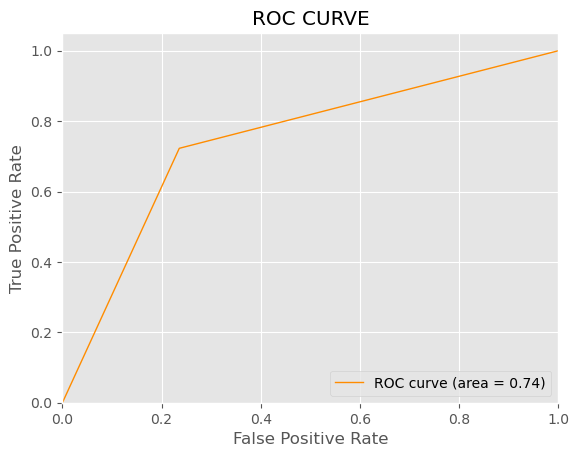

In [79]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [153]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout

def tensorflow_based_model(): 
    inputs = Input(name='inputs', shape=[max_len])  # step1
    layer = Embedding(2000, 50, input_length=max_len)(inputs)  # step2
    
    # Use 1D Convolutional layer instead of LSTM
    layer = Conv1D(64)

def CNN_based_model(): 
    inputs = Input(name='inputs', shape=[max_len]) 
    layer = Embedding(2000, 50, input_length=max_len)(inputs)  
    
    layer = Conv1D(64, kernel_size=3, padding='same', activation='relu')(layer) 
    layer = MaxPooling1D(pool_size=2)(layer)  
    
    layer = Flatten()(layer)  
    
    layer = Dense(256, name='FC1')(layer)  
    layer = Activation('relu')(layer)  
    layer = Dropout(0.5)(layer)  
    
    layer = Dense(1, name='out_layer')(layer) 
    layer = Activation('sigmoid')(layer)  
    
    model = Model(inputs=inputs, outputs=layer)  
    return model 


In [155]:
model_cnn = CNN_based_model() # here we are calling the function of created model
model_cnn.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [157]:
history_cnn=model_cnn.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - accuracy: 0.5472 - loss: 0.6753 - val_accuracy: 0.7339 - val_loss: 0.5328
Epoch 2/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.7585 - loss: 0.5044 - val_accuracy: 0.7475 - val_loss: 0.5132
Epoch 3/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.7749 - loss: 0.4750 - val_accuracy: 0.7464 - val_loss: 0.5141
Epoch 4/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.7949 - loss: 0.4456 - val_accuracy: 0.7350 - val_loss: 0.5257
Epoch 5/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.8120 - loss: 0.4151 - val_accuracy: 0.7375 - val_loss: 0.5485
Epoch 6/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.8436 - loss: 0.3604 - val_accuracy: 0.7286 - val_loss: 0.5716
Training finished !!


In [158]:
accr2 = model_cnn.evaluate(X_test,Y_test) #we are starting to test the model here

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7242 - loss: 0.5791


In [161]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr2[1]))

Test set
  Accuracy: 0.73


In [163]:
y_pred2 = model.predict(X_test) #getting predictions on the trained model
y_pred2 = (y_pred2 > 0.5)

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


[[4203 1806]
 [1458 4533]]




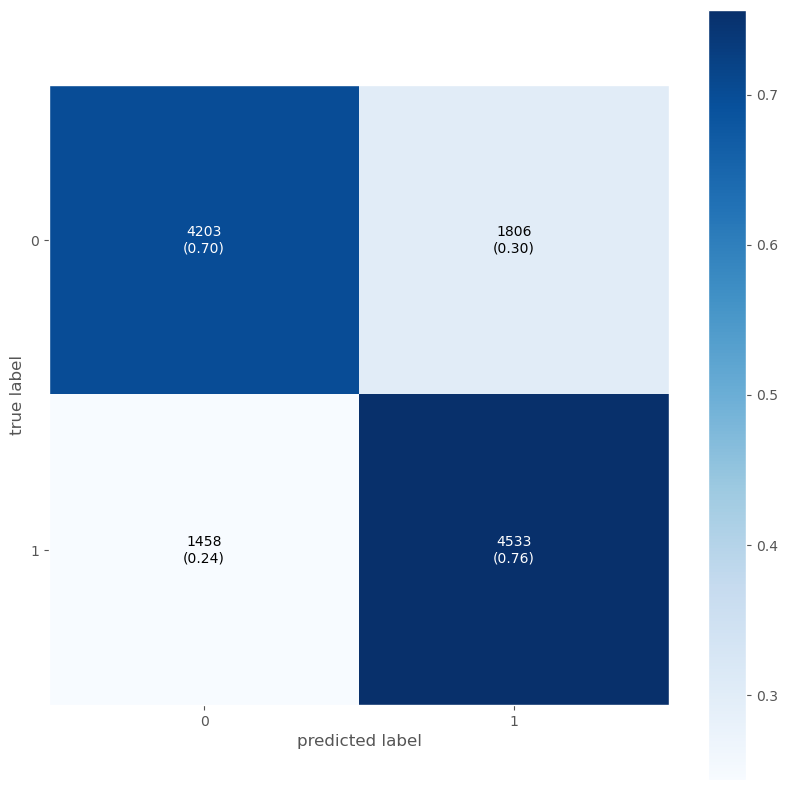

In [165]:
CR=confusion_matrix(Y_test, y_pred2)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

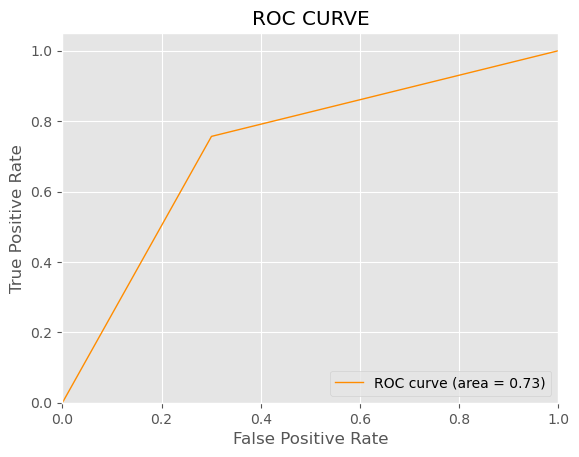

In [169]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()